# Задание 2: Подсчет велосипедов

В этом задании мы будем использовать общедоступные данные о подсчете велосипедов в городе Гент (Бельгия). 

В Coupure Links, рядом с Факультетом инженерии биологических наук, счетчик отслеживает количество проезжающих велосипедистов в обоих направлениях.

In [203]:
from datetime import date, timedelta, datetime
from calendar import month_abbr, day_abbr

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [204]:
filename = "..\\..\\data\\002\\fietstellingencoupure.csv"
df = pd.read_csv(filename, sep=";")
df.head()

,datum,tijd,ri Centrum,ri Mariakerke
0,14/07/2011,17:44,21,46
1,14/07/2011,17:59,17,60
2,14/07/2011,18:14,13,48
3,14/07/2011,18:29,22,48
4,14/07/2011,18:44,15,51


In [205]:
'''
УПРАЖНЕНИЕ 2
Предварительно обработайте данные:
- Объедините столбцы «datum» и «tijd» в одну серию Pandas строковых значений даты и времени, назовите эту новую переменную совмещенной .
- Разберите строковые значения даты и времени на объекты даты и времени.
- Установите результирующий столбец даты и времени в качестве индекса df DataFrame.
- Удалите исходные столбцы «datum» и «tijd», используя метод drop , и вызовите новый кадр данных df2 .
- Переименуйте столбцы в DataFrame «ri Centrum», «ri Mariakerke» соответственно. 'direction_centre', 'direction_mariakerke' с использованием метода переименования .
'''

df['timestamp'] = pd.to_datetime(df['datum'] + ' ' + df['tijd'], format='%d/%m/%Y %H:%M')
df.set_index('timestamp', inplace=True)
df.drop(['datum', 'tijd'], axis=1, inplace=True)
df.rename(columns= {'ri Centrum' : 'direction_centre', 'ri Mariakerke' : 'direction_mariakerke'}, inplace=True)
df.head()


,direction_centre,direction_mariakerke
timestamp,,
2011-07-14 17:44:00,21,46
2011-07-14 17:59:00,17,60
2011-07-14 18:14:00,13,48
2011-07-14 18:29:00,22,48
2011-07-14 18:44:00,15,51


<Axes: xlabel='timestamp'>

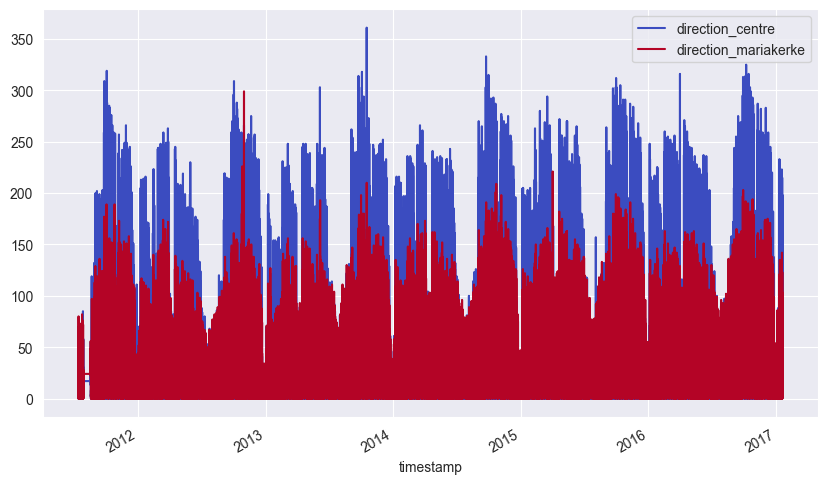

In [206]:
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(colormap='coolwarm', ax=ax)


In [207]:
'''
УПРАЖНЕНИЕ 3
Напишите функцию process_bike_count_data(df), которая выполняет этапы обработки, как описано выше,
для входного кадра данных Pandas и возвращает обновленный кадр данных.
'''

def process_bike_count_data(df: pd.DataFrame) -> pd.DataFrame:
    df['timestamp'] = pd.to_datetime(df['datum'] + ' ' + df['tijd'], format='%d/%m/%Y %H:%M')
    df.set_index('timestamp', inplace=True)
    df.drop(['datum', 'tijd'], axis=1, inplace=True)
    df.rename(columns= {'ri Centrum' : 'direction_centre', 'ri Mariakerke' : 'direction_mariakerke'}, inplace=True)
    return df

In [208]:
df_raw = pd.read_csv(filename, sep=';')
df_preprocessed = process_bike_count_data(df_raw)
df_preprocessed.head()
df_preprocessed.to_csv("bike_count_interim.csv")


In [209]:
df = pd.read_csv("bike_count_interim.csv", index_col=0, parse_dates=True)

'''
Вычислите разницу между каждым из последовательных значений индекса
'''
pd.Series(df.index).diff()


0                    NaT
1        0 days 00:15:00
2        0 days 00:15:00
3        0 days 00:15:00
4        0 days 00:15:00
               ...      
191442   0 days 00:15:00
191443   0 days 00:15:00
191444   0 days 00:15:00
191445   0 days 00:15:00
191446   0 days 00:15:00
Name: timestamp, Length: 191447, dtype: timedelta64[ns]

In [210]:
'''
Представляет интерес количество возможных интервалов:
'''

pd.Series(df.index).diff().value_counts()


timestamp
0 days 00:15:00      191356
0 days 00:16:00           9
0 days 00:09:00           6
0 days 00:13:00           6
-1 days +23:15:00         6
0 days 00:04:00           5
0 days 01:15:00           5
0 days 00:06:00           4
0 days 00:00:00           4
0 days 00:03:00           4
0 days 00:11:00           4
0 days 00:12:00           4
0 days 00:02:00           4
0 days 00:08:00           4
0 days 00:38:00           3
0 days 00:10:00           3
0 days 00:01:00           3
0 days 00:37:00           3
0 days 00:05:00           2
0 days 00:14:00           2
0 days 01:24:00           1
0 days 06:49:00           1
20 days 21:29:00          1
0 days 00:30:00           1
0 days 00:20:00           1
0 days 00:26:00           1
0 days 00:07:00           1
0 days 01:11:00           1
0 days 00:29:00           1
Name: count, dtype: int64

In [211]:
df.describe()

,direction_centre,direction_mariakerke
count,191447.000000,191447.000000
mean,25.545237,25.338585
std,31.625619,26.903810
min,0.000000,0.000000
25%,5.000000,7.000000
50%,17.000000,17.000000
75%,34.000000,34.000000
max,361.000000,299.000000


In [212]:
'''
УПРАЖНЕНИЕ 4
Создайте новый ряд Pandas df_both , который содержит сумму значений обоих направлений.
'''

df["df_both"] = df["direction_centre"] + df["direction_mariakerke"]
df.head()

,direction_centre,direction_mariakerke,df_both
timestamp,,,
2011-07-14 17:44:00,21,46,67
2011-07-14 17:59:00,17,60,77
2011-07-14 18:14:00,13,48,61
2011-07-14 18:29:00,22,48,70
2011-07-14 18:44:00,15,51,66


In [213]:
'''
УПРАЖНЕНИЕ 5
Используя df_both из предыдущего упражнения, создайте новую серию df_quiet, содержащую только те интервалы, за которые в сумме в обоих направлениях проехало менее 5 велосипедистов.
'''

df_quiet = df[df["df_both"] < 5]
df_quiet.head()


,direction_centre,direction_mariakerke,df_both
timestamp,,,
2011-07-15 00:59:00,0,4,4
2011-07-15 01:44:00,1,2,3
2011-07-15 02:29:00,0,0,0
2011-07-15 02:44:00,0,1,1
2011-07-15 02:59:00,1,0,1


In [214]:
'''
УПРАЖНЕНИЕ 6
По исходным данным df выбрать только те интервалы, за которые в том или ином направлении проехало менее 3 велосипедистов. 
Следовательно, менее 3 велосипедистов в сторону центра или менее 3 велосипедистов в сторону Мариакерке.
'''

df_quiet2 = df[(df["direction_centre"] < 3) | (df["direction_mariakerke"] < 3)]
df_quiet2.head()


,direction_centre,direction_mariakerke,df_both
timestamp,,,
2011-07-14 23:59:00,1,13,14
2011-07-15 00:14:00,2,3,5
2011-07-15 00:44:00,2,6,8
2011-07-15 00:59:00,0,4,4
2011-07-15 01:29:00,1,10,11


In [215]:
'''
УПРАЖНЕНИЕ 7
Какое среднее количество велосипедистов проезжает каждые 15 минут?
'''
ts = df.resample("15min").sum()
ts["df_both"].mean()


50.352801008962814

In [216]:
'''
УПРАЖНЕНИЕ 8
Какое среднее количество велосипедистов проезжает каждый час?
'''
ts = df.resample("1h").sum()
ts["df_both"].mean()


201.4091219219716

In [217]:
'''
УПРАЖНЕНИЕ 9
Каковы 10 самых высоких пиковых значений, наблюдаемых в течение любого из интервалов для направления к центру Гента?
'''
df["direction_centre"].nlargest(10)


timestamp
2013-10-16 21:38:00    361
2014-09-23 08:12:00    333
2016-10-06 09:16:00    325
2011-10-04 08:27:00    319
2013-10-03 08:49:00    318
2016-03-31 00:45:00    316
2016-10-13 09:16:00    316
2014-09-30 08:05:00    315
2013-09-23 08:34:00    314
2016-10-04 09:01:00    314
Name: direction_centre, dtype: int64

In [218]:
'''
УПРАЖНЕНИЕ 10
Какое максимальное количество велосипедистов проехало за один день в обоих направлениях вместе взятых?
'''
ts = df.resample("1d").sum()
ts["df_both"].nlargest(1)


timestamp
2016-09-29    10770
Freq: D, Name: df_both, dtype: int64

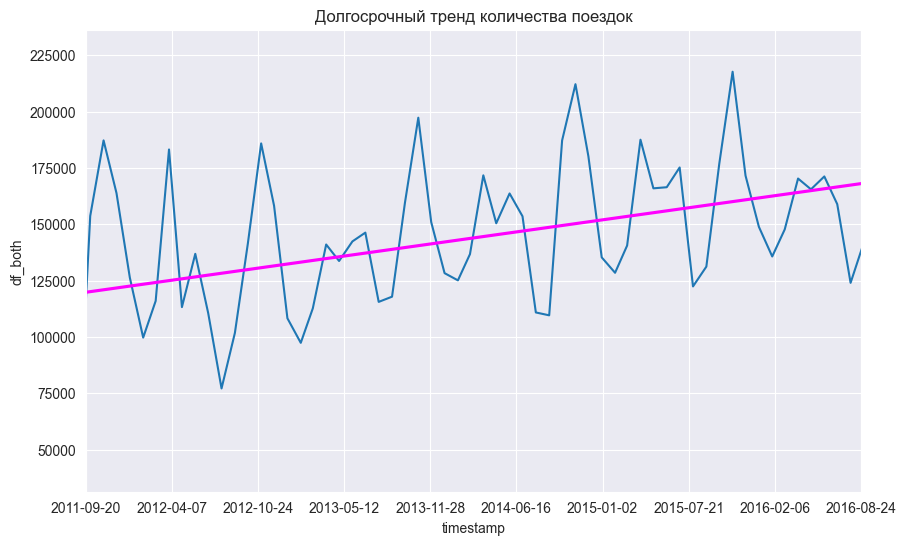

In [219]:
'''
УПРАЖНЕНИЕ 11
Как выглядит долгосрочный тренд? Рассчитайте ежемесячные суммы и постройте график результата.
'''

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
ts = df.resample("ME").sum()

# https://stackoverflow.com/questions/69170874/how-to-plot-a-regression-line-on-a-timeseries-line-plot
ts.index = ts.index.map(pd.Timestamp.toordinal)

ax1 = ts["df_both"].plot(figsize=(10, 6), grid=True, legend=False, title='Долгосрочный тренд количества поездок')

# add a regression line
sns.regplot(data=ts, x=ts.index, y=ts.df_both, ax=ax1, color='magenta', label='Linear Model', scatter=False, ci=None)
ax1.set_xlim(ts.index[4], ts.index[-7])

# convert the axis back to datetime
xticks = ax1.get_xticks()
labels = [pd.Timestamp.fromordinal(int(label)).date() for label in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(labels)

plt.show()

In [220]:
'''
УПРАЖНЕНИЕ 12
Давайте посмотрим на некоторые краткосрочные модели. 
Для данных за первые 3 недели января 2014 г. рассчитайте почасовые подсчеты и визуализируйте их.
'''
dr1 = datetime(2014, 1, 1)
dr2 = dr1 + timedelta(weeks=3)
# print(f"dr1={dr1} dr2={dr2}")
ts = df[(df.index >= dr1) & (df.index <= dr2)].resample("h").sum()
ts.head()


,direction_centre,direction_mariakerke,df_both
timestamp,,,
2014-01-01 00:00:00,48,13,61
2014-01-01 01:00:00,46,31,77
2014-01-01 02:00:00,86,38,124
2014-01-01 03:00:00,66,29,95
2014-01-01 04:00:00,33,36,69


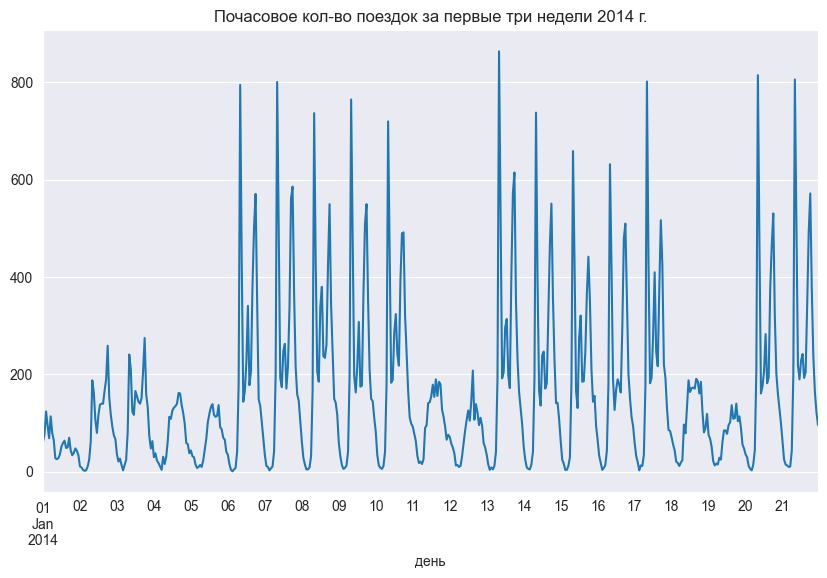

In [229]:
ax = ts["df_both"].plot(figsize=(10, 6), grid=True, legend=False, title='Почасовое кол-во поездок за первые три недели 2014 г.')
ax.set_xlabel("день") 
plt.show()


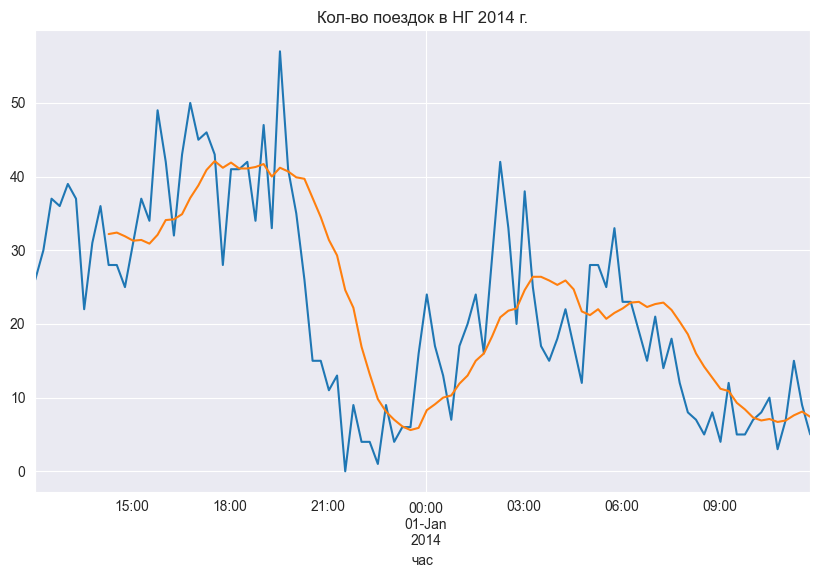

In [228]:
'''
УПРАЖНЕНИЕ 13
Выберите подмножество набора данных с 2013-12-31 12:00:00 до 2014-01-01 12:00:00 и назначьте результат новой переменной newyear.
Постройте выбранные данные newyear.
Используйте скользящую функцию с окном из 10 значений, чтобы сгладить данные за этот период и построить график сглаженной версии.
'''

dr1 = datetime(2013, 12, 31, 12, 0, 0)
dr2 = datetime(2014, 1, 1, 12, 0, 0)
newyear = df[(df.index >= dr1) & (df.index <= dr2)]
newyear.head()

newyear["df_both"].plot(figsize=(10, 6), grid=True, legend=False, title='Кол-во поездок в НГ 2014 г.')
ax = newyear["df_both"].rolling(10).mean().plot()
ax.set_xlabel("час") 

plt.show()

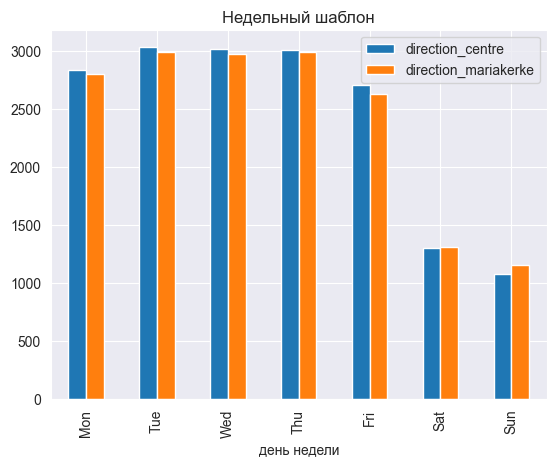

In [230]:
'''
Недельный шаблон
'''

df_daily = df.resample('D').sum()
ax = df_daily.groupby(df_daily.index.dayofweek).mean().loc[:, ["direction_centre", "direction_mariakerke"]].plot(kind = 'bar', title='Недельный шаблон')

ticks_loc = ax.get_xticks().tolist()
ax.xaxis.set_ticks(ticks_loc)
values_list = list(day_abbr)
ax.set_xticklabels(values_list)
ax.set_xlabel("день недели") 

plt.show()

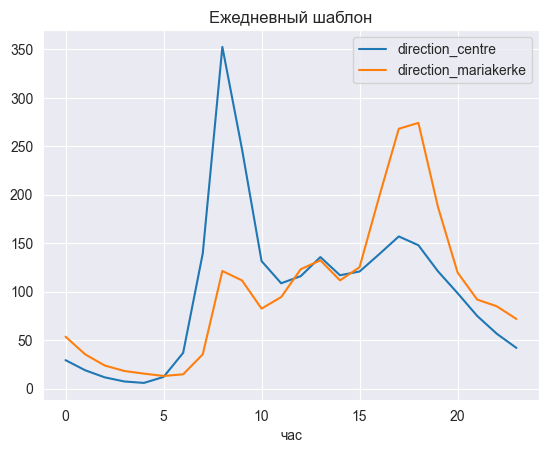

In [231]:
'''
Ежедневный шаблон
'''

df_hourly = df.resample('h').sum()
ax = df_hourly.groupby(df_hourly.index.hour).mean().loc[:, ["direction_centre", "direction_mariakerke"]].plot(title='Ежедневный шаблон')
ax.set_xlabel("час") 

plt.show()

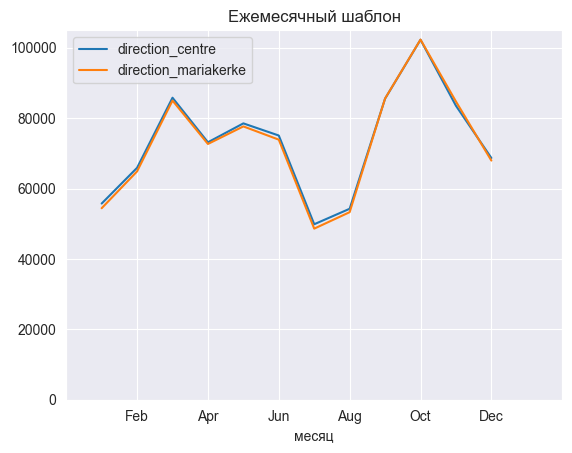

In [232]:
'''
Ежемесячный шаблон
'''

df_monthly = df.resample('ME').sum()
ax = df_monthly.groupby(df_monthly.index.month).mean().loc[:, ["direction_centre", "direction_mariakerke"]].plot(title='Ежемесячный шаблон')

ax.set_ylim(0)

ticks_loc = ax.get_xticks().tolist()
ax.xaxis.set_ticks(ticks_loc)
values_list = list(month_abbr)[0::2]
values_list.append("")
ax.set_xticklabels(values_list)
ax.set_xlabel("месяц") 

plt.show()
